<a href="https://colab.research.google.com/github/fereol023/My-ML-Courses-/blob/main/TP1_R%C3%A9gression_Polynomiale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **I- La regression polynomiale par Numpy**
Supposons, qu’un site e-commerce souhaite savoir si le temps de chargement des pages web de son site impacte le montant du panier moyen de l’internaute.

On souhaite trouver une fonction de prédiction qui modélisera cette corrélation. 

Note : Nous utiliserons un jeux de données aléatoires pour illustrer la régression polynomiale.

1-Importer la librairie Numpy : `import numpy as np`

2-Importer la librairire matplotlib: `import matplotlib.pyplot as plt`

3-Initialisation du générateur :code donné

4-Génération aléatoire des temps de chargements des pages (*pageSpeeds*) et des montants d'achats (*purchaseAmount*): code donné

5-Afficher avec une figure en points les vecteurs générés avec pagesSpeeds en abscisse et (*purchaseAmount*) en ordonnée. Ajouter des titres aux axes et afficher la grille. Vous devez avoir une figure qui ressemble à:
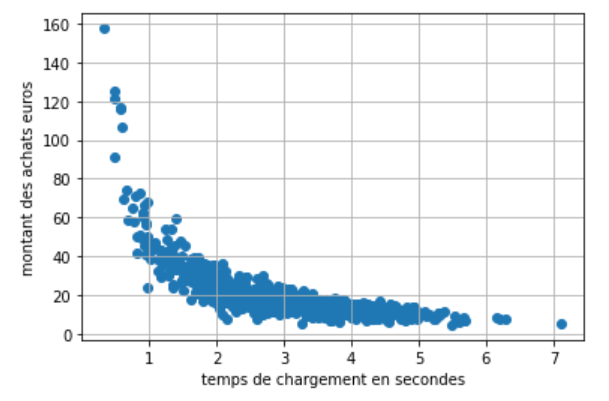



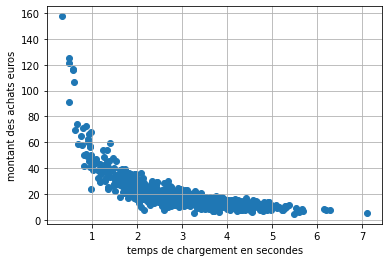

In [3]:
#importation des librairies numpy et pyplt
import numpy as np
import matplotlib.pyplot as plt

#initialisation du générateur 
np.random.seed(2)
# génération de 1000 nombres aléatoires distribués selon la loi normale X ~ N(3, 1) 
#en d'autre terme, les pages chargeront en moyenne en 3 secondes et un ecart-type de 1 seconde. 
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
#génération aléatoires de montants d'achat corrélés aux temps de chargement
purchaseAmount = np.random.normal(50.0, 10.0, 1000) /pageSpeeds

#ajout des labels des axes x ('temps de chargement en secondes') et y ('montant des achats euros')

#generation de la courbe en points (scatter)
plt.scatter(pageSpeeds, purchaseAmount)
plt.xlabel('temps de chargement en secondes')
plt.ylabel('montant des achats euros')
#activation de la grille
plt.grid()
#affichage de la courbe
plt.show()

# Implémentation d'une régression plynomiale
Numpy a une fonction **Polyfit** permettant une implémentation facile de la regression polynomiale.

**Polyfit** permet de construire un modèle polynomial de degré n qui convient bien à nos données (en minimisant au maximum la marge d’erreur).

Rappelons nous que plus on rajoute un degré au polynôme, plus ce dernier devient sensible aux données et s’y adapte mieux.

Essayons de trouver un modèle avec un polynôme de 4 degrés.

1-Commencer par créer deux vecteurs Numpy x et y: x vecteur des variables explicatives créé à partir du vecteur *pageSpeeds*, y vecteur cible créé à partir du vecteur *purchaseAmount*

2- Utiliser ensuite la fonction 'polyfit' de Numpy pour générer un modèle prédictif du montant d'achat selon de le temps de chargement de la page. 'Polyfit' prend en arguement x, y et le dégré du plolynome (4 pour ce premier essai) (https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html).

`numpy.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)`

'polyfit' retourne un vecteur des coefficients du polynome généré. Pour retrouver le polynome correspondant, on passe le vecteur des coefficients à la fonction 'poly1d' de Numpy (https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html). 
Exemple: 'p = np.poly1d([1, 2, 3])' génère le polynome image.png

3- Afficher le polynome résultat p4

4- Afficher la courbe du polynome p4 dans la figure précendente.

        4         3         2
0.5401 x - 8.856 x + 52.25 x - 135.3 x + 147.6


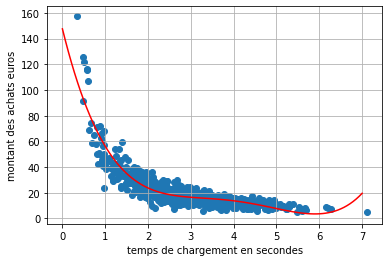

In [15]:
# x: le temps de chargement de la page est notre variable prédictive (à créer à partir de la liste pageSpeeds)
x = np.array(pageSpeeds)
# y: montant d'achat est la variable cible (qu'on cherche à prédire) (à créer à partir de la liste purchaseAmount)
y = np.array(purchaseAmount)
#Régression avec la fonction polyfit (finir le code)
theta = np.polyfit(x, y, deg=4)

p4 = np.poly1d(theta) 
#print p4
print(p4)
#afficher la courbe de p4
#générer un vecteur de 100 points pour les abscisses
xp = np.linspace(0, 7, 100)
#Pour réafficher la figure précédente
plt.xlabel('temps de chargement en secondes')
plt.ylabel('montant des achats euros')
plt.scatter(pageSpeeds,purchaseAmount)
plt.grid()
#afficher la courbe de la fonction p4 
plt.plot(xp, p4(xp), c='r')
plt.show()


# Evaluation du modèle
Pour évaluer la performance du modèle, on va calculer l'erreur quadratique des montants d'achat estimés par la fonction p4 par rapport au valeurs cibles dans y. La fonction r2_score du module 'metrics' de la librairie scikit-learn permet de calculer cette mesure.

1- Importer la fonction r2_score :
```
from scikit-learn.metrics import r2_score
```
2- Calculer l'erreur quadratique 'erreurp4' avec 'r2_score' qui prend en argument le vecteur cible y et le vecteur estimé par la fonction p4:
```
erreurp4=r2_score(y,p4(x))
```
3- Afficher l'erreur calculée. 

4- Ajouter l'erreurp4 à une liste appelée listeErreurs

In [26]:
#importer la fonction r2_score de sklearn.metrics
from sklearn.metrics import r2_score

#calculer erreurp4 avec r2_score
erreurp4=r2_score(y,p4(x))

#afficher l'erreur
print(erreurp4)
#Ajouter l'erreur donné par R2_Score 
listeErreurs=[]
listeErreurs.append(erreurp4)

0.8279147500954436


# Variation des degrés des polynomes
Pour augmenter la précision des modèles de prédiction, il est possible de reduire l'erreur d'estimation en augmentant le degré du polynome généré par polyfit.

1- Générer une fonction p5 avec la fonction polyfit avec un dégré 5.

2- Calculer son erreur quadratique erreurp5 et l'ajouter dans la liste 'listeErreurs'.

3- Refaire les même étapes avec un degré 6 (p6 et erreurp6) et ajouter l'erreur correspondante à 'listeErreurs'

4- Afficher la liste 'listeErreurs'. Que remarquez-vous?

5-Afficher les coubes de p4, p5 et p6 dans la même figures avec des couleurs différentes (code donné). Que remarquez-vous?

6- Ajouter une légende à la figure et l'exporter dans un fichier de type 'png'.

[0.8279147500954436, 0.8553884386186104, 0.8700733999871757]


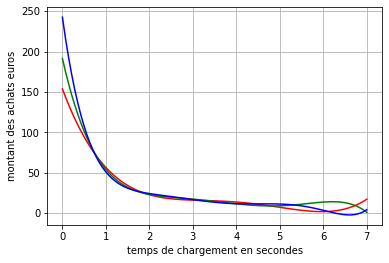

In [27]:
#générer p5 
p5 = np.poly1d(np.polyfit(x,y,5))
erreurp5=r2_score(y, p5(x))
listeErreurs.append(erreurp5)

#ajouter l'erreur de p5 à listeErreurs

#générer p6
p6 = np.poly1d(np.polyfit(x,y,6))
erreurp6=r2_score(y, p6(x))
listeErreurs.append(erreurp6)
#ajouter l'erreur de p6 à listeErreurs

#afficher listeErreurs
print(listeErreurs)

xp = np.linspace(0, 7, 100)
#Pour afficher toutes les courbes dans la même figure
plt.xlabel('temps de chargement en secondes')
plt.ylabel('montant des achats euros')
#plt.scatter(pageSpeeds,purchaseAmount)
plt.grid()
#afficher la courbe de la fonction p4 
plt.plot(xp, p4(xp), c='r')
plt.plot(xp, p5(xp), c='g')
plt.plot(xp, p6(xp), c='b')
plt.show()

# Train and test

L'erreur quadratique n'a été calculée que sur les données qui ont servi à la génération du modèle de prédiction. Nous allons maintenant créer des données test qui vont servir seulement à la validation des modèles. Ces données ne sont pas vues pendant la phase d'apprentissage. Elles sont utilisées seulement pour le calcul de l'erreur quadratique.

1- En utilisant le slicing, départager les vecteurs x et y en deux vecteurs chacun: `x_train`, `x_test`, et `y_train`, `y_test`, avec une taille respective de 700 et 300.

2- Reprenez le code de génération des modèles p4, p5 et p6 en modifiant `x` par `x_train `et `y` par `y_train`.

3- Reprenez le code de calcul des erreurs `erreurp4`, `erreurp5` et `erreurp6` en utilisant `x_test`, `y_test`et enregsitrer ces erreurs dans une liste au nom `listeErreursTest`.



In [28]:
#départager les vecteurs x et y en deux vecteurs chacun: `x_train`, `x_test`, et `y_train`, `y_test`
x_train = x[:700]
y_train = y[:700]
x_test = x[700:]
y_test = y[700:]

#Ajouter eurreurp dans la liste "listeErreursTest"
listeErreursTest=[]

#générer p4 et calculer son r2_score
p4 = np.poly1d(np.polyfit(x_train, y_train, 4))
erreurp4 = r2_score(y_test, p4(x_test))
listeErreursTest.append(erreurp4)

#générer p5 et calculer son r2_score
p5 = np.poly1d(np.polyfit(x_train, y_train, 5))
erreurp5 = r2_score(y_test, p5(x_test))
listeErreursTest.append(erreurp5)


#générer p6
#Ajouter erreurp6 dans la liste "listeErreursTest"
p6 = np.poly1d(np.polyfit(x_train, y_train, 6))
erreurp6 = r2_score(y_test, p6(x_test))
listeErreursTest.append(erreurp6)

#afficher listeErreursTest
print(listeErreursTest)

[0.7945130480123732, 0.802917794957335, 0.8208860206696531]


# Visualisation de l'effet du dégré du polynôme

L'objectif est de visualiser la variation de la performance des modèles générés sou forme d'un hsitogramme


1.   Créer une une liste `x` contenant les différents degrés de polynôme utilisés dans la regression (p=4, p=5 et p=6).
2.   Céer un plot de type courbe en pointillé et des marqueurs de type "square" ("gs--") avec la liste `x` pour les abcisees et la liste `listeErreursTest' pour les ordonnées .
3.  Utiliser la proprité xticks pour afficher les 3 dégré sur l'axe des x.
4. Définir des titres pour les axes et afficher la grille.




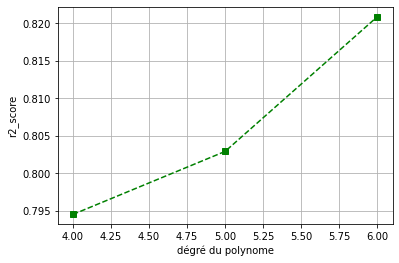

In [32]:
deg = [4,5,6]

plt.xlabel('dégré du polynome')
plt.ylabel('r2_score')
#plt.scatter(pageSpeeds,purchaseAmount)
plt.grid()
#afficher la courbe de la fonction p4 
plt.plot(deg, listeErreursTest, 'gs--')
#plt.plot(deg, listeErreurs, c='g')
plt.show()